# All_Beauty 데이터셋 EDA

In [1]:
import pandas as pd
import json

file_path = "All_Beauty.jsonl"

data = []
with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        data.append(json.loads(line)) 

all = pd.DataFrame(data)
print(all.head()) 


   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text images        asin  \
0  This spray is really nice. It smells really go...     []  B00YQ6X8EO   
1  This product does what I need it to do, I just...     []  B081TJ8YS3   
2                          Smells good, feels great!     []  B07PNNCSP9   
3                                     Felt synthetic     []  B09JS339BZ   
4                                            Love it     []  B08BZ63GMJ   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588687728923             0   
1  B081TJ8YS3  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588615855070  

In [2]:
all.describe()

,rating,timestamp,helpful_vote
count,701528.000000,7.015280e+05,701528.000000
mean,3.960245,1.554781e+12,0.923588
std,1.494452,8.005792e+10,5.471391
min,1.000000,9.730527e+11,0.000000
25%,3.000000,1.501616e+12,0.000000
50%,5.000000,1.571595e+12,0.000000
75%,5.000000,1.614647e+12,1.000000
max,5.000000,1.694220e+12,646.000000


In [3]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701528 non-null  object 
 2   text               701528 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 48.8+ MB


In [4]:
all.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

## rating

In [5]:
all.rating.unique()

array([5., 4., 1., 3., 2.])

## title

In [30]:
all['title'].isnull().sum()

np.int64(0)

In [6]:
all.title.nunique()

376394

In [7]:
all.title

0         Such a lovely scent but not overpowering.
1            Works great but smells a little weird.
2                                              Yes!
3                                 Synthetic feeling
4                                                A+
                            ...                    
701523                                   Four Stars
701524                                       Pretty
701525                         Great sunless tanner
701526                The Crown on top is a Ring!!!
701527                     Good Shampoo/Conditioner
Name: title, Length: 701528, dtype: object

LLM으로 임베딩 해야할 듯.
tile과 text를 concat해서 임베딩하면 좋을 듯.

## text

In [9]:
all.text

0         This spray is really nice. It smells really go...
1         This product does what I need it to do, I just...
2                                 Smells good, feels great!
3                                            Felt synthetic
4                                                   Love it
                                ...                        
701523      Conditioner is great  shampoo not as I expected
701524    Did not work! Used the whole bottle and my hai...
701525           Product as expected. Shipping was on time.
701526    Not only is it a delicious fragrance, but also...
701527    The conditioner doesn't really make your hair ...
Name: text, Length: 701528, dtype: object

1. 긍정, 부정 정도만 파악
2. 그 정도를 파악  
-> llm 사용해서 그 정도를 나누고 rating과의 연관성 찾아보기

In [10]:
all['review'] = all['title'].fillna('') + ' ' + all['text'].fillna('')

In [11]:
all.review

0         Such a lovely scent but not overpowering. This...
1         Works great but smells a little weird. This pr...
2                            Yes! Smells good, feels great!
3                          Synthetic feeling Felt synthetic
4                                                A+ Love it
                                ...                        
701523    Four Stars Conditioner is great  shampoo not a...
701524    Pretty Did not work! Used the whole bottle and...
701525    Great sunless tanner Product as expected. Ship...
701526    The Crown on top is a Ring!!! Not only is it a...
701527    Good Shampoo/Conditioner The conditioner doesn...
Name: review, Length: 701528, dtype: object

In [12]:
# 데이터 전처리
import re

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z가-힣\s]', '', text)
    text = text.lower()
    return text

all['cleaned_review'] = all['review'].apply(preprocess_text)

In [13]:
import transformers
print(transformers.__version__)

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


4.48.0


In [17]:
from textblob import TextBlob

# 감정 점수 계산 함수
def sentiment_score(text):
    return TextBlob(text).sentiment.polarity  # -1 ~ 1 점수 반환

all['sentiment_score'] = all['review'].apply(sentiment_score)

In [21]:
all.sentiment_score.head()

0    0.343403
1    0.122500
2    0.850000
3    0.000000
4    0.500000
Name: sentiment_score, dtype: float64

In [22]:
all.to_csv("sentiment_results.csv", index=False)

In [24]:
all.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,cleaned_review,sentiment_score
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,Such a lovely scent but not overpowering. This...,such a lovely scent but not overpowering this ...,0.343403
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,Works great but smells a little weird. This pr...,works great but smells a little weird this pro...,0.122500
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,"Yes! Smells good, feels great!",yes smells good feels great,0.850000
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,Synthetic feeling Felt synthetic,synthetic feeling felt synthetic,0.000000
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,A+ Love it,a love it,0.500000


In [25]:
score_rating = ['sentiment_score', 'rating']
all[score_rating].corr()

,sentiment_score,rating
sentiment_score,1.000000,0.591741
rating,0.591741,1.000000


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data = all.corr(), annot=True, fmt='.2f', linewidths=.5, cmap = 'coolwarm')

ModuleNotFoundError: No module named 'matplotlib'

## images

In [10]:
all.images
#list 모두 null값인지 확인하기

0         []
1         []
2         []
3         []
4         []
          ..
701523    []
701524    []
701525    []
701526    []
701527    []
Name: images, Length: 701528, dtype: object

In [32]:
empty_count = all.images.apply(lambda x: len(x) == 0).sum()
non_empty_count = all.images.apply(lambda x: len(x) > 0).sum()
print(f"빈 리스트: {empty_count}")
print(f"안 빈 리스트: {non_empty_count}")
print(empty_count + non_empty_count)

빈 리스트: 641844
안 빈 리스트: 59684
701528


In [35]:
# 채워져있는 리스트 비율
print(59684/701528)
# 이미지 있는 리뷰가 8.5% 밖에 안되네..

0.08507714588726323


In [12]:
non_empty_lists = all.images[all.images.apply(lambda x: len(x) > 0)]
print(non_empty_lists)

5         [{'small_image_url': 'https://images-na.ssl-im...
7         [{'small_image_url': 'https://m.media-amazon.c...
45        [{'small_image_url': 'https://images-na.ssl-im...
56        [{'small_image_url': 'https://m.media-amazon.c...
106       [{'small_image_url': 'https://images-na.ssl-im...
                                ...                        
701503    [{'small_image_url': 'https://images-na.ssl-im...
701504    [{'small_image_url': 'https://images-na.ssl-im...
701507    [{'small_image_url': 'https://images-na.ssl-im...
701514    [{'small_image_url': 'https://images-na.ssl-im...
701521    [{'small_image_url': 'https://images-na.ssl-im...
Name: images, Length: 59684, dtype: object


이미지 임베딩을 해야되겠다고 생각했는데 이미지가 있는 리뷰의 개수가 매우 적다. 하지만 리뷰 개수가 많을수록 helpful_vote가 클 것으로 예상

In [39]:
all['image_cnt'] = all.images.apply(lambda x: len(x))

In [42]:
vars = ['image_cnt', 'helpful_vote']
all[vars].corr()

,image_cnt,helpful_vote
image_cnt,1.00000,0.08623
helpful_vote,0.08623,1.00000


0.086  
리뷰 개수와 helpful_vote 간 연관이 있다고 보기 어려울 것 같다.

## asin

ID of the product.

In [13]:
all.asin.nunique()

115709

## parent_asin

Parent ID of the product. Note: Products with different colors, styles, sizes usually belong to the same parent ID. The “asin” in previous Amazon datasets is actually parent ID. Please use parent ID to find product meta.  
제품의 부모 ID. 참고: 색상, 스타일, 크기가 다른 제품은 일반적으로 동일한 부모 ID에 속합니다. 이전 Amazon 데이터 세트의 "asin"은 실제로 부모 ID입니다. 제품 메타를 찾으려면 부모 ID를 사용하세요.

In [14]:
all.parent_asin

0         B00YQ6X8EO
1         B081TJ8YS3
2         B097R46CSY
3         B09JS339BZ
4         B08BZ63GMJ
             ...    
701523    B006YUIWKA
701524    B006YUIWKA
701525    B06ZZV9MZT
701526    B000HB6VLE
701527    B0093MXHFG
Name: parent_asin, Length: 701528, dtype: object

In [43]:
all.parent_asin.nunique()

112565

meta 데이터와 공통인 변수

## user_id

ID of the reviewer

In [15]:
all.user_id

0         AGKHLEW2SOWHNMFQIJGBECAF7INQ
1         AGKHLEW2SOWHNMFQIJGBECAF7INQ
2         AE74DYR3QUGVPZJ3P7RFWBGIX7XQ
3         AFQLNQNQYFWQZPJQZS6V3NZU4QBQ
4         AFQLNQNQYFWQZPJQZS6V3NZU4QBQ
                      ...             
701523    AFIXGFVEGLMOTMBTJL7H3VSIETDQ
701524    AFV7YZFOJF564EZGET5LG45K4QEA
701525    AHYDCWDMMVMLBX7FY7M7JKADKRDQ
701526    AF6ZIAEN7TQ2WY5ZL77F6JDPV7XQ
701527    AGIYQU6RK6TBKBCMWKVPBPBMMJNA
Name: user_id, Length: 701528, dtype: object

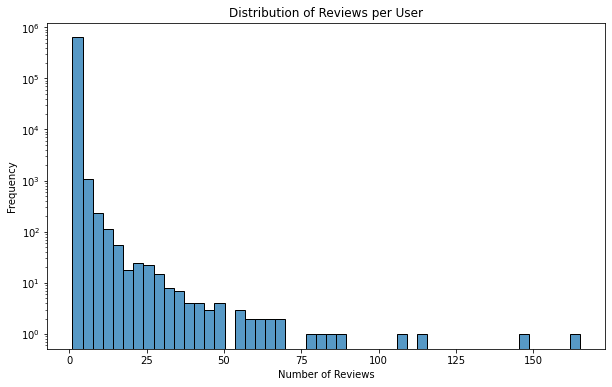

Unique Users: 631986
Top Users by Review Count:
AG73BVBKUOH22USSFJA5ZWL7AKXA      165
AEZP6Z2C5AVQDZAJECQYZWQRNG3Q      146
AEMP3A7IKW37CMWFXNKXWW6HGJHA_1    115
AHDVSLWHSORYGG3S5QZMVDFNOXUQ      108
AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1     87
AFDYIK3FNPY2JFBQYUWC6GSBMIRQ_2     83
AFXF3EGQTQDXMRLDWFU7UBFQZB7Q       81
AEJU3Z6HDAERETMYI2CXBQVPPDFA       79
AHY2TURQPNIDXZGH2CMQLZ343YMQ       69
AEOK4TQIKGO23SJKZ6PW4FETNNDA_1     68
Name: user_id, dtype: int64


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

unique_users = all['user_id'].nunique()

top_users = all['user_id'].value_counts().head(10)

# 사용자당 리뷰 수 분포 
user_review_counts = all['user_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(user_review_counts, bins=50, kde=False)
plt.title('Distribution of Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.yscale('log')  # 분포 확인을 위해 로그 스케일 사용
plt.show()

# 결과 출력
print(f"Unique Users: {unique_users}")
print("Top Users by Review Count:")
print(top_users)

## timestamp

Time of the review (unix time) 리뷰 시각

In [18]:
all.timestamp

0         1588687728923
1         1588615855070
2         1589665266052
3         1643393630220
4         1609322563534
              ...      
701523    1478227021000
701524    1480908730000
701525    1590547974067
701526    1184798209000
701527    1366944486000
Name: timestamp, Length: 701528, dtype: int64

In [19]:
import datetime

time = pd.to_datetime(all.timestamp)
time

0        1970-01-01 00:26:28.687728923
1        1970-01-01 00:26:28.615855070
2        1970-01-01 00:26:29.665266052
3        1970-01-01 00:27:23.393630220
4        1970-01-01 00:26:49.322563534
                      ...             
701523   1970-01-01 00:24:38.227021000
701524   1970-01-01 00:24:40.908730000
701525   1970-01-01 00:26:30.547974067
701526   1970-01-01 00:19:44.798209000
701527   1970-01-01 00:22:46.944486000
Name: timestamp, Length: 701528, dtype: datetime64[ns]

In [20]:
min(time)

Timestamp('1970-01-01 00:16:13.052658')

In [21]:
max(time)

Timestamp('1970-01-01 00:28:14.219976666')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


eda_summary = {
    "Missing Values": all.isnull().sum(),
    "Unique Values": all.nunique(),
    "Data Types": all.dtypes
}

# 주요 통계 분석
numeric_columns = all.select_dtypes(include=['float64', 'int64']).columns
numeric_summary = all[numeric_columns].describe()

# 1. Rating 분포
plt.figure(figsize=(8, 5))
sns.histplot(all['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 2. Top 10 Titles
top_titles = all['title'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(y=top_titles.index, x=top_titles.values, orient='h')
plt.title('Top 10 Titles')
plt.xlabel('Frequency')
plt.ylabel('Title')
plt.show()

# 3. Helpful Vote 분석
plt.figure(figsize=(8, 5))
sns.histplot(all['helpful_vote'], bins=20, kde=True)
plt.title('Helpful Votes Distribution')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.show()

# 4. Timestamp 변환 및 분포
all['timestamp'] = pd.to_datetime(all['timestamp'], unit='s')
all['year'] = all['timestamp'].dt.year

plt.figure(figsize=(8, 5))
sns.countplot(data=all, x='year')
plt.title('Review Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# EDA 결과 요약 제공
tools.display_dataframe_to_user(name="EDA Summary - Statistical Overview", dataframe=numeric_summary)

ModuleNotFoundError: No module named 'matplotlib'

## helpful_vote

Helpful votes of the review

In [27]:
all.helpful_vote.unique()

array([  0,   1,   2, 430,   4,   3,   8,   5,  13,   6,  16,   9,   7,
        49,  11,  15,  58,  24,  20,  34,  10,  21,  50,  19,  52,  23,
        14,  38,  18,  40,  36,  31,  30,  22,  37,  43,  29,  51, 120,
        47,  32,  12,  33,  17,  92,  42,  41,  63,  27,  28,  25, 133,
        57,  26,  64,  71,  35, 114,  89,  53, 101,  60,  72,  45,  46,
       419,  59, 117,  44,  65,  39,  74,  99,  56,  54,  48,  69,  75,
       178,  55,  67, 111, 150, 143,  73,  79, 148, 177,  80, 266, 154,
        86,  66,  95,  81, 165, 140, 171,  76,  85,  62, 113,  61, 404,
       166, 124, 118,  90, 607, 315,  70,  88, 112, 426, 102, 158, 145,
       129,  98, 107, 109,  78, 185, 314, 187, 123, 155, 142, 126, 218,
       127, 104, 172, 147, 331, 106,  68, 141, 159, 175, 173, 241, 135,
       646, 119, 151, 149,  83,  82, 136, 134, 132,  93, 121, 594, 399,
       389, 473, 351, 467, 435, 354, 234, 519,  94, 131, 181, 103, 105,
       431, 100, 190,  77, 138, 367, 197, 125, 152, 244, 409, 24

- 특정 리뷰가 다른 사용자들에게 얼마나 유용하다고 평가되었는지 나타내는 지표  
- 리뷰를 읽은 사용자가 해당 리뷰가 도움이 되었는지 여부를 투표하고 yes로 투표된 집계수 의미(no는 이 변수에 반영되지 않음)

## verified_purchase

User purchase verification 사용자 구매여부

In [21]:
all.verified_purchase.unique()

array([ True, False])